In [1]:
import pandas as pd
import emoji
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re
import sys
from nltk.corpus import stopwords
import numpy as np

In [2]:
def custom_token(tweet, keep_alnum = False,keep_stop = False, keep_punct= False):
    
    token_list = word_tokenize(tweet)
    
    if not keep_punct:
        token_list = [token for token in token_list
                     if token not in string.punctuation]
    if not keep_alnum:
        token_list = [token for token in token_list 
                      if token.isalpha()]
    if not keep_stop:
        stop_words = set(stopwords.words('english'))
        stop_words.discard("nor")
        token_list = [token for token in token_list 
                     if not token in stop_words]
        
    return token_list

In [3]:
def replace_retweet(tweet, default_replace=""):
    tweet = re.sub('Ppm\s+',default_replace,tweet)
    return tweet

In [4]:
def repalce_user(tweet,default_replace="User"):
    
    tweet = re.sub('\B\@\w+',default_replace,tweet)
    
    return tweet

In [5]:
def demojizeT(tweet):
    tweet = emoji.demojize(tweet)
    return tweet

In [6]:
def replace_url(tweet, default_replace=""):
    tweet = re.sub('(http|https):\/\/\S+',default_replace,tweet)
    return tweet

In [7]:
def replace_hashtag(tweet, default_replace=""):
    
    tweet = re.sub('#+',default_replace,tweet)
    
    return tweet

In [8]:
def stem_tokens(tokens,stemmer):
    token_list = []
    
    for token in tokens:
        token_list.append(stemmer.stem(token))
    return token_list

In [9]:
def process_tweet(tweet, verbose=False):
    if verbose:print("Initial tweet:{}".format(tweet))
    #Twitter Features
    tweet = replace_retweet(tweet)
    tweet = repalce_user(tweet,"")
    tweet = replace_url(tweet)
    tweet = replace_hashtag(tweet)
    if verbose:print("Post twitter processing tweet:{}".format(tweet))
    #Word features
    tweet = demojizeT(tweet)
    
    if verbose:print("Post Word processing tweet: {}".format(tweet))
    tokens = custom_token(tweet, keep_alnum=False, keep_stop=False) # tokenize
    stemmer = SnowballStemmer("english") # define stemmer
    stem = stem_tokens(tokens, stemmer) # stem tokens
    
    return stem

In [10]:
df = pd.read_csv("tweet_data.csv")

df.head(10)

,textID,tweet_text,sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative
1,1956967696,Funeral ceremony...gloomy friday...,negative
2,1956967789,wants to hang out with friends SOON!,positive
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative
5,1956969035,@charviray Charlene my love. I miss you,negative
6,1956969172,@kelcouch I'm sorry at least it's Friday?,negative
7,1956969531,Choked on her retainers,negative
8,1956970047,Ugh! I have to beat this stupid song to get to...,negative
9,1956970424,@BrodyJenner if u watch the hills in london u ...,negative


In [11]:
df["tokens"] = df["tweet_text"].apply(process_tweet)

df["tweet_sentiment"] = df["sentiment"].apply(lambda i: 1
                                             if i == "positive" else 0)

df.head(10)

,textID,tweet_text,sentiment,tokens,tweet_sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,"[layin, n, bed, headach, ughhhh, waitin, call]",0
1,1956967696,Funeral ceremony...gloomy friday...,negative,"[funer, ceremoni, gloomi, friday]",0
2,1956967789,wants to hang out with friends SOON!,positive,"[want, hang, friend, soon]",1
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,"[go, prom, bc, bf, like, friend]",0
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,[hmmm],0
5,1956969035,@charviray Charlene my love. I miss you,negative,"[charlen, love, i, miss]",0
6,1956969172,@kelcouch I'm sorry at least it's Friday?,negative,"[i, sorri, least, friday]",0
7,1956969531,Choked on her retainers,negative,"[choke, retain]",0
8,1956970047,Ugh! I have to beat this stupid song to get to...,negative,"[ugh, i, beat, stupid, song, get, next, rude]",0
9,1956970424,@BrodyJenner if u watch the hills in london u ...,negative,"[u, watch, hill, london, u, realis, tourtur, w...",0


In [12]:
df

,textID,tweet_text,sentiment,tokens,tweet_sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,"[layin, n, bed, headach, ughhhh, waitin, call]",0
1,1956967696,Funeral ceremony...gloomy friday...,negative,"[funer, ceremoni, gloomi, friday]",0
2,1956967789,wants to hang out with friends SOON!,positive,"[want, hang, friend, soon]",1
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,"[go, prom, bc, bf, like, friend]",0
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,[hmmm],0
...,...,...,...,...,...
18722,1753918818,"had SUCH and AMAZING time last night, McFly we...",positive,"[such, amaz, time, last, night, mcfli, incred]",1
18723,1753918881,@jasimmo Ooo showing of your French skills!! l...,positive,"[ooo, show, french, skill, lol, thing, good, l...",1
18724,1753918900,Succesfully following Tayla!!,positive,"[succes, follow, tayla]",1
18725,1753919001,Happy Mothers Day All my love,positive,"[happi, mother, day, all, love]",1


In [13]:
X  = df["tokens"].tolist()
y = df["tweet_sentiment"].tolist()

In [14]:
#Tokenization
print(X)

[['layin', 'n', 'bed', 'headach', 'ughhhh', 'waitin', 'call'], ['funer', 'ceremoni', 'gloomi', 'friday'], ['want', 'hang', 'friend', 'soon'], ['go', 'prom', 'bc', 'bf', 'like', 'friend'], ['hmmm'], ['charlen', 'love', 'i', 'miss'], ['i', 'sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'i', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['u', 'watch', 'hill', 'london', 'u', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['so', 'sleepi', 'even', 'late', 'i', 'fail'], ['ladi', 'gaga', 'tweet', 'impress', 'video', 'leak', 'know'], ['how', 'you', 'convinc', 'i', 'alway', 'want', 'what', 'signal', 'i', 'give', 'damn', 'i', 'think', 'i', 'lost', 'anoth', 'friend'], ['on', 'way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'kegger', 'damn', 'feel', 'old'], ['sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'just', 

In [15]:
#Vectorization
print(y)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 

In [16]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [17]:
corpus = [["i", "love", "nlp"],
          ["i", "miss", "you"],
          ["i", "love", "you"],
          ["you", "are", "happy", "to", "learn"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

In [18]:
sentiment = [1, 0, 1, 1, 0, 0]
print(len(sentiment))

6


In [19]:
def build_freqs(tweet_list, sentiment_list):
    freqs = {}
    for tweet,sentiment in zip(tweet_list, sentiment_list):
        for word in tweet:
            pair = (word, sentiment)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
                
    return freqs

In [20]:
freqs = build_freqs(corpus, sentiment)

In [21]:
print(freqs)


print(type(freqs))

{('i', 1): 2, ('love', 1): 2, ('nlp', 1): 1, ('i', 0): 3, ('miss', 0): 1, ('you', 0): 1, ('you', 1): 2, ('are', 1): 1, ('happy', 1): 1, ('to', 1): 1, ('learn', 1): 1, ('lost', 0): 1, ('my', 0): 1, ('computer', 0): 1, ('am', 0): 1, ('so', 0): 1, ('sad', 0): 1}
<class 'dict'>


In [22]:
freqs_all = build_freqs(X,y)

In [23]:
print("Frequency of word 'love' in + tweets:{}".format(freqs_all["love", 1]))

print("Frequency of word 'love' in - tweets:{}".format(freqs_all["love", 0]))

Frequency of word 'love' in + tweets:1323
Frequency of word 'love' in - tweets:70


In [24]:
def tweet_to_ferq(tweet,freqs):
    x = np.zeros((2,))
    for word in tweet:
        if(word, 1) in freqs:
            x[0] += freqs[(word,1)]
        if(word, 0) in freqs:
            x[1] += freqs[(word,0)]
            
    return x

In [25]:
print(tweet_to_ferq(["i", "love", "nlp"],freqs))

print(type(tweet_to_ferq(["i", "love", "nlp"],freqs)))

arr = tweet_to_ferq(["i", "love", "nlp"],freqs)

arr.shape

[5. 3.]
<class 'numpy.ndarray'>


(2,)

In [26]:
print(tweet_to_ferq(["i", "love", "nlp"],freqs_all))

[4999. 4493.]


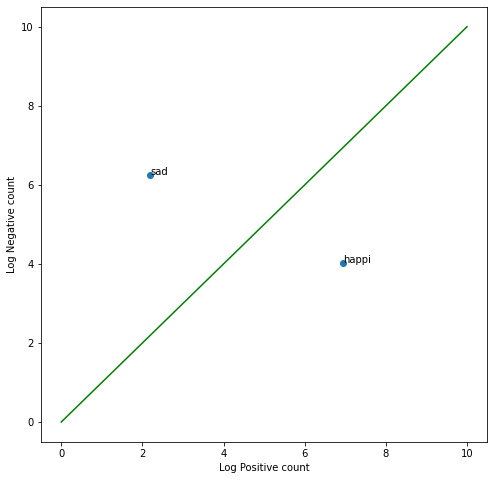

In [70]:
#Positive negative frequency
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (8, 8))

word1 = "happi"
word2 = "sad"

def word_features(word, freqs):
    x = np.zeros((2,))
    if (word, 1) in freqs:
        x[0] = np.log(freqs[(word, 1)] + 1)
    if (word, 0) in freqs:
        x[1] = np.log(freqs[(word, 0)]+1)
    return x

x_axis = [word_features(word, freqs_all)[0] for word in [word1, word2]]
y_axis = [word_features(word, freqs_all)[1] for word in [word1, word2]]

ax.scatter(x_axis, y_axis)  

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

ax.plot([0, 10], [0, 10], color = 'green')
plt.text(x_axis[0], y_axis[0], word1)
plt.text(x_axis[1], y_axis[1], word2)
plt.show()

In [28]:
#Bag of words

corpus =  [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
def fit_cv(tweet_corpus):
    cv_vect = CountVectorizer(tokenizer= lambda x:x,
                             preprocessor = lambda x:x)
    cv_vect.fit(tweet_corpus)
    return cv_vect

In [31]:
cv_vect = fit_cv(corpus)

C:\Users\Hans\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [32]:
ft = cv_vect.get_feature_names()

C:\Users\Hans\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
#This is features
print("There are {} features in this corpus".format(len(ft)))

print(ft)

There are 13 features in this corpus
['am', 'computer', 'happy', 'hate', 'i', 'lost', 'love', 'miss', 'my', 'nlp', 'sad', 'so', 'you']


In [34]:
cv_mtx = cv_vect.transform(corpus)

In [35]:
print("Matrix shape is: {}".format(cv_mtx.shape))

Matrix shape is: (6, 13)


In [36]:
cv_mtx.toarray()

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]], dtype=int64)

In [37]:
new_tweet = [["lost","lost","miss","miss"]]

cv_vect.transform(new_tweet).toarray()

array([[0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0]], dtype=int64)

In [38]:
#Term Frequency – Inverse Document Frequency (TF-IDF)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
def fit_tfidf(tweet_corpus):
    tf_vect = TfidfVectorizer(tokenizer= lambda x:x,
                             preprocessor = lambda x:x)
    tf_vect.fit(tweet_corpus)
    
    return tf_vect

In [41]:
tf_vect = fit_tfidf(corpus)

tf_mtx = tf_vect.transform(corpus)

In [42]:
ft2 = tf_vect.get_feature_names()

In [43]:
print("There are {} features in this corpus".format(len(ft2)))

print(ft2)

There are 13 features in this corpus
['am', 'computer', 'happy', 'hate', 'i', 'lost', 'love', 'miss', 'my', 'nlp', 'sad', 'so', 'you']


In [44]:
print(tf_mtx.shape)

(6, 13)


In [45]:
tf_mtx.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.56921261, 0.        , 0.        , 0.82219037,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.70710678],
       [0.        , 0.        , 0.        , 0.96260755, 0.        ,
        0.        , 0.27089981, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.68172171, 0.55902156, 0.        ,
        0.        , 0.47196441, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.52182349, 0.        , 0.        , 0.42790272,
        0.52182349, 0.        , 0.        , 0.52182349, 0.        ,
        0.        , 0.        , 0.        ],
       [0.52182349, 0.        , 0.        , 0.        , 0.42790272,
        0.        , 0.     

In [46]:
new_tweet2 = [["I", "hate", "nlp"]]

tf_vect.transform(new_tweet2).toarray()

array([[0.        , 0.        , 0.        , 0.6340862 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.77326237,
        0.        , 0.        , 0.        ]])

In [47]:
#Train/Test Split

In [48]:
import seaborn as sn

In [49]:
def plot_confusion(cm):
    plt.figure(figsize=(5,5))
    sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
    plt.xlabel("Prediction")
    plt.ylabel("True Value")
    plt.title("Confusion Matrix")
    
    return sn

In [50]:
from sklearn.model_selection import  train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, train_size=0.80)

In [52]:
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))
print("\n")
print("Train proportion: {:.0%}".format(len(X_train)/(len(X_train)+len(X_test))))

Size of X_train: 14981
Size of y_train: 14981


Size of X_test: 3746
Size of y_test: 3746


Train proportion: 80%


In [53]:
import random
id = random.randint(0,len(X_train))
print("Train tweet: {}".format(X_train[id]))
print("Sentiment: {}".format(y_train[id]))

Train tweet: ['sorri', 'hear']
Sentiment: 0


In [54]:
#Logistics regression
from sklearn.linear_model import LogisticRegression

In [55]:
#Used to fit the logistics regression model on the x and y training data
def fit_lr(X_train, y_train):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model

In [56]:
#Pos/Neg Frequency

In [57]:
freqs = build_freqs(X_train, y_train)
X_train_pn = [tweet_to_ferq(tweet, freqs) for tweet in X_train]
X_test_pn = [tweet_to_ferq(tweet, freqs) for tweet in X_test]

In [58]:
model_lr_pn = fit_lr(X_train_pn, y_train)
print(model_lr_pn.coef_, model_lr_pn.intercept_)

[[ 0.00318976 -0.00276048]] [-0.65985453]


In [59]:
#Count Vector

In [60]:
cv = fit_cv(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

C:\Users\Hans\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [61]:
model_lr_cv = fit_lr(X_train_cv,y_train)

C:\Users\Hans\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
#TF-IDF

In [63]:
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

C:\Users\Hans\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [64]:
model_lr_tf = fit_lr(X_train_tf,y_train)

In [65]:
#Checking Performance Metrics of our model

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [67]:
y_pred_lr_pn = model_lr_pn.predict(X_test_pn)

In [68]:
print("LR Model Accuracy : {:.2%}".format(accuracy_score(y_test,y_pred_lr_pn)))

LR Model Accuracy : 77.42%


<module 'seaborn' from 'C:\\Users\\Hans\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

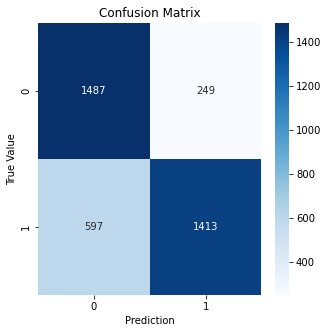

In [69]:
plot_confusion(confusion_matrix(y_test,y_pred_lr_pn))

In [71]:
y_pred_lr_cv = model_lr_cv.predict(X_test_cv)

In [72]:
print("LR Model Accuracy :{:.2%}".format(accuracy_score(y_test,y_pred_lr_cv)))

LR Model Accuracy :88.23%


<module 'seaborn' from 'C:\\Users\\Hans\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

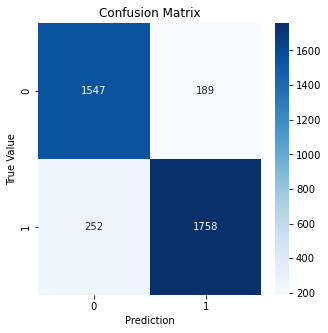

In [73]:
plot_confusion(confusion_matrix(y_test,y_pred_lr_cv))

In [74]:
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)

In [75]:
print("LR Model Accuracy :{:.2%}".format(accuracy_score(y_test,y_pred_lr_tf)))

LR Model Accuracy :87.83%


<module 'seaborn' from 'C:\\Users\\Hans\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

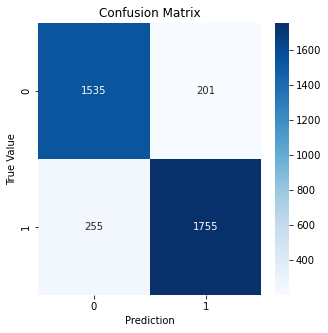

In [76]:
plot_confusion(confusion_matrix(y_test,y_pred_lr_tf))

In [80]:
your_tweet = """I hate the current state of the economy just applied for a visa"""

In [81]:
def predict_tweet(tweet):
    processed_tweet = process_tweet(tweet)
    transformed_tweet = tf.transform([processed_tweet])
    prediction = model_lr_tf.predict(transformed_tweet)
    
    if prediction == 1:
        return "Prediction is positive sentiment"
    else:
        return "Prediction is negative"
    

In [82]:
predict_tweet(your_tweet)

'Prediction is negative'